<a href="https://colab.research.google.com/github/Parths131/traffic-forecasting/blob/main/sarima_raipur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blr-traffic-data.csv to blr-traffic-data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
path = '/content/blr-traffic-data.csv'
df = pd.read_csv(path)

In [ ]:
order = (2,1,2)
seasonal_order = (0,1,1,12)

In [ ]:
df_excluded = df[['Month','rai1']]
df_excluded = df_excluded[33:107]

In [ ]:
df_excluded

,Month,rai1
33,Jan-14,"69,736"
34,Feb-14,"69,520"
35,Mar-14,"62,829"
36,Apr-14,"69,860"
37,May-14,"84,345"
...,...,...
102,Oct-19,"1,82,410"
103,Nov-19,"1,97,829"
104,Dec-19,"2,01,842"
105,Jan-20,"1,94,875"


In [ ]:
df_excluded['Month'] = pd.to_datetime(df_excluded['Month'], format='%b-%y')

In [ ]:
df_excluded['rai1'] = df_excluded['rai1'].str.replace(',', '').astype(int)

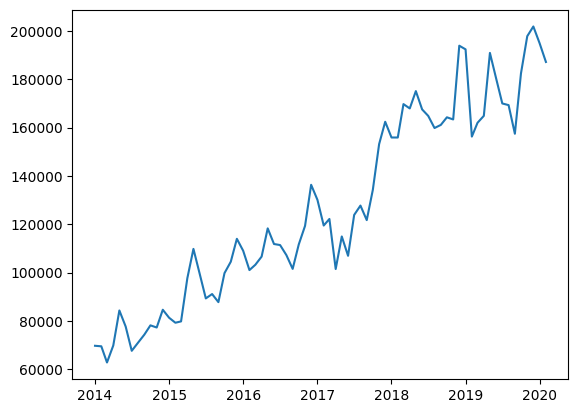

In [ ]:
plt.plot(df_excluded['Month'], df_excluded['rai1'])

In [ ]:
adf_test = adfuller(df_excluded['rai1'].diff().dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -3.945905396254317
p-value: 0.0017218160275749197


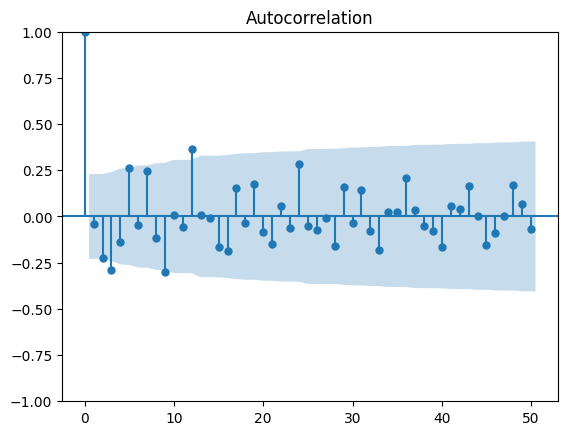

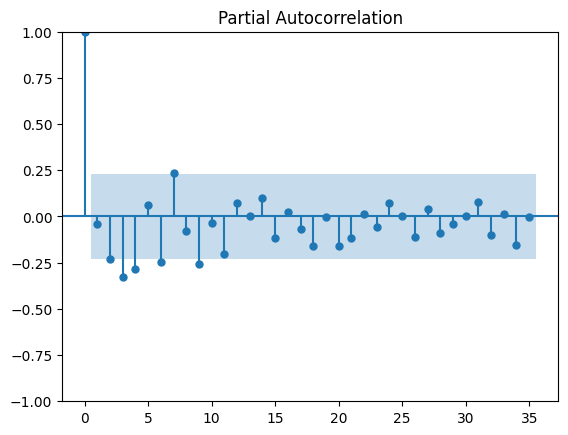

In [ ]:
acf_original = plot_acf(df_excluded['rai1'].diff().dropna(), lags=50)

pacf_original = plot_pacf(df_excluded['rai1'].diff().dropna(), lags=35)

In [ ]:
test_start = datetime(2019, 8, 1)
df_train = df_excluded[(df_excluded['Month'] < test_start)]

In [ ]:
df_test = df_excluded[(df_excluded['Month'] >= test_start)]

In [ ]:
testing_range = pd.date_range(start=datetime(2019, 8, 1), end=datetime(2020, 2, 1), freq='MS')

model = SARIMAX(df_train['rai1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Month': testing_range, 'rai1': testing})

print(testing_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


        Month           rai1
67 2019-08-01  165856.799015
68 2019-09-01  167771.927910
69 2019-10-01  175682.378475
70 2019-11-01  179937.077667
71 2019-12-01  202929.079626
72 2020-01-01  199781.119246
73 2020-02-01  175214.593329


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
testing_df = testing_df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
rmse = np.sqrt(np.mean((df_test['rai1'] - testing_df['rai1']) ** 2))

mae = np.mean(np.abs(df_test['rai1'] - testing_df['rai1']))

rmse, mae

(9646.242995357743, 8044.325470903971)

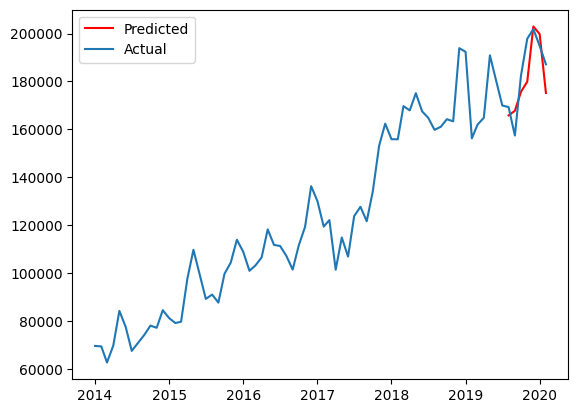

In [ ]:
plt.plot(testing_df['Month'], testing_df['rai1'], label='Predicted', color='red')
plt.plot(df_excluded['Month'], df_excluded['rai1'], label='Actual')
plt.legend()

In [ ]:
forecast_range = pd.date_range(start=datetime(2020, 3, 1), end=datetime(2049, 12, 31), freq='MS')

model = SARIMAX(df_excluded['rai1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Month': forecast_range, 'rai1': predictions})

print(predictions_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


         Month           rai1
107 2020-03-01  196370.238853
108 2020-04-01  193031.434953
109 2020-05-01  208771.878443
110 2020-06-01  199796.732721
111 2020-07-01  196458.149498
..         ...            ...
460 2049-08-01  839399.101524
461 2049-09-01  832607.655393
462 2049-10-01  848349.514392
463 2049-11-01  858824.683036
464 2049-12-01  871202.825359

[358 rows x 2 columns]


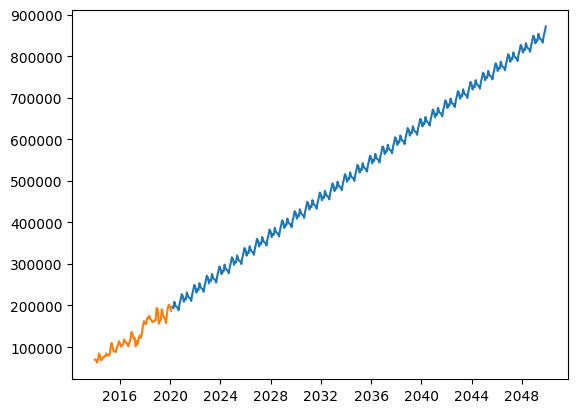

In [ ]:
plt.plot(predictions_df['Month'], predictions_df['rai1'], label='Predicted')
plt.plot(df_excluded['Month'], df_excluded['rai1'], label='Predicted')

In [ ]:
predictions_df

,Month,rai1
107,2020-03-01,196370.238853
108,2020-04-01,193031.434953
109,2020-05-01,208771.878443
110,2020-06-01,199796.732721
111,2020-07-01,196458.149498
...,...,...
460,2049-08-01,839399.101524
461,2049-09-01,832607.655393
462,2049-10-01,848349.514392
463,2049-11-01,858824.683036
